# Logistic Regression with Fashion MNIST

The Fashion MNIST dataset is designed to take the place of the digit MNIST dataset because many models can fairly easily solve that problem. When I ran the Logistic Regression on MNIST after 20 epochs I was able to achieve an 87.34% accuracy rating. Let's see what a Logistic Regression does on the Fashion MNIST dataset.

In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [2]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data/FashionMNIST', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)
test_dataset = dsets.MNIST(root='./data/FashionMNIST', 
                           train=False, 
                           transform=transforms.ToTensor())

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

## Example Image and label

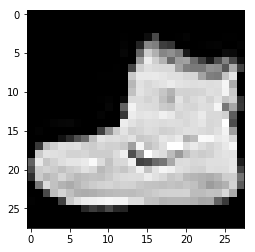

In [4]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray') #

In [5]:
# Label
train_dataset[0][1]

tensor(9)

In [6]:
batch_size = 100
n_iters = 12000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [7]:
batch = next(iter(train_loader))
print(len(batch))
print(type(batch))

images, labels = batch
print(images.shape)
print(labels.shape)

2
<class 'list'>
torch.Size([100, 1, 28, 28])
torch.Size([100])


# Visualizing Many

labels: tensor([8, 1, 0, 4, 6, 7, 2, 7, 4, 1, 2, 1, 3, 8, 7, 1, 6, 1, 3, 6, 5, 4, 8, 9,
        6, 6, 6, 3, 1, 6, 5, 9, 4, 5, 5, 1, 5, 2, 3, 0, 7, 1, 3, 6, 8, 4, 4, 6,
        4, 1, 9, 8, 7, 1, 0, 4, 5, 1, 8, 5, 0, 2, 3, 7, 8, 9, 7, 7, 7, 8, 2, 2,
        2, 9, 1, 5, 2, 1, 3, 9, 6, 2, 1, 2, 7, 6, 0, 3, 9, 8, 2, 3, 2, 8, 0, 9,
        4, 6, 7, 4])


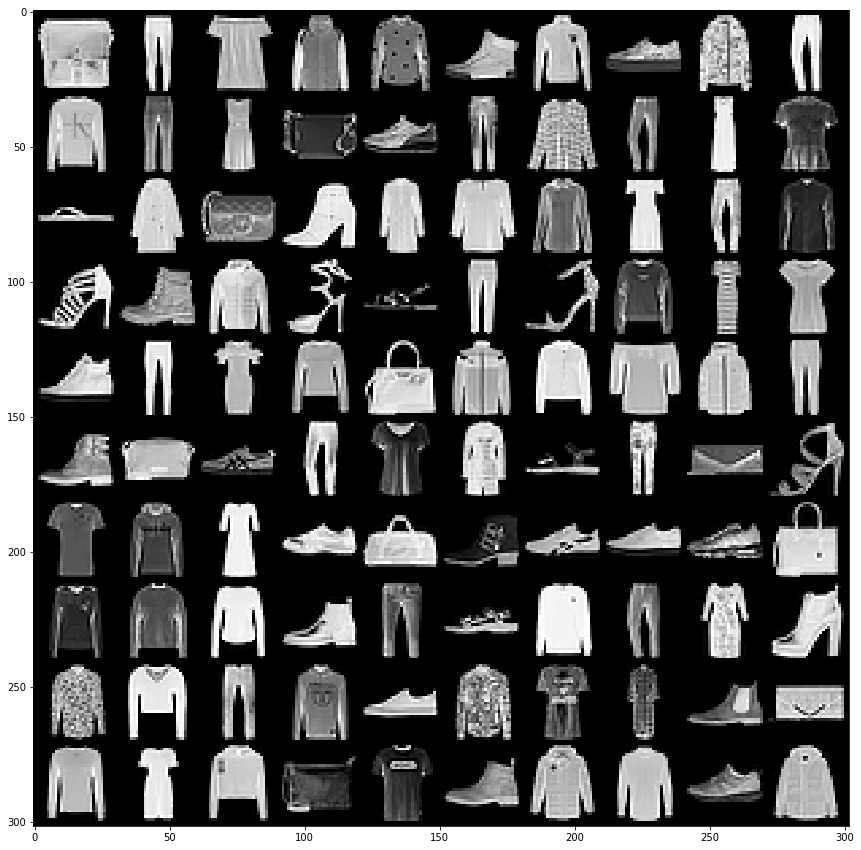

In [8]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:',labels)

# Creating the Logistic Regression Model

In [9]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [10]:
input_dim = 28*28 # dimensions of the picture
output_dim = 10 # number of different labels (0-9)

model = LogisticRegressionModel(input_dim, output_dim)

# pass model to the gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)

# loss class
criterion = nn.CrossEntropyLoss() # cross entropy for LR

# learning rate and optimizer
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

cuda:0


# Train the Model

In [11]:
iter = 0
print(device)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        
        # pass the data variables to the gpu
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 1000 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                images = images.view(-1, 28*28).to(device)
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions need to be brought back to cpu
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()
            
            accuracy = 100 * correct.item() / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

cuda:0
Iteration: 1000. Loss: 1.4337621927261353. Accuracy: 65.09
Iteration: 2000. Loss: 1.0583282709121704. Accuracy: 67.33
Iteration: 3000. Loss: 0.9192489385604858. Accuracy: 69.08
Iteration: 4000. Loss: 0.8001941442489624. Accuracy: 70.61
Iteration: 5000. Loss: 0.8203256130218506. Accuracy: 72.3
Iteration: 6000. Loss: 0.7291069030761719. Accuracy: 73.41
Iteration: 7000. Loss: 0.7645260095596313. Accuracy: 74.14
Iteration: 8000. Loss: 0.8828501105308533. Accuracy: 74.87
Iteration: 9000. Loss: 0.6644091606140137. Accuracy: 75.58
Iteration: 10000. Loss: 0.6661103963851929. Accuracy: 76.01
Iteration: 11000. Loss: 0.7587969899177551. Accuracy: 76.38
Iteration: 12000. Loss: 0.6584954261779785. Accuracy: 76.8


After 20 Epochs we were able to achieve an accuracy rating of **76.8%**. Let's see if we can beat that with the standard Neural Network and then a CNN next.